# Algoritmos de optimización - Reto 1

Nombre: Antoni Climent Muñoz <br> 
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [3]:
# Torres de Hanoi
# We will use a list to store the movements
movements = []
def TowerOfHanoi(n, from_rod, to_rod, aux_rod): 
    if n > 0:
        TowerOfHanoi(n-1, from_rod, aux_rod, to_rod) 
        movements.append([n, from_rod, to_rod]) 
        TowerOfHanoi(n-1, aux_rod, to_rod, from_rod) 
  
# Number of disks

for N in [4,5]:
    movements = []
    # We are using a recursive function that will fill the movements list
    TowerOfHanoi(N, 'Rod_1', 'Rod_3', 'Rod_2') 

    # Print the movements
    print(f"\nNumber of disks: {N}")
    print("Disk | From | To")
    for n, rod_source, rod_target in movements:
        print(n, rod_source, rod_target)




Number of disks: 4
Disk | From | To
1 Rod_1 Rod_2
2 Rod_1 Rod_3
1 Rod_2 Rod_3
3 Rod_1 Rod_2
1 Rod_3 Rod_1
2 Rod_3 Rod_2
1 Rod_1 Rod_2
4 Rod_1 Rod_3
1 Rod_2 Rod_3
2 Rod_2 Rod_1
1 Rod_3 Rod_1
3 Rod_2 Rod_3
1 Rod_1 Rod_2
2 Rod_1 Rod_3
1 Rod_2 Rod_3

Number of disks: 5
Disk | From | To
1 Rod_1 Rod_3
2 Rod_1 Rod_2
1 Rod_3 Rod_2
3 Rod_1 Rod_3
1 Rod_2 Rod_1
2 Rod_2 Rod_3
1 Rod_1 Rod_3
4 Rod_1 Rod_2
1 Rod_3 Rod_2
2 Rod_3 Rod_1
1 Rod_2 Rod_1
3 Rod_3 Rod_2
1 Rod_1 Rod_3
2 Rod_1 Rod_2
1 Rod_3 Rod_2
5 Rod_1 Rod_3
1 Rod_2 Rod_1
2 Rod_2 Rod_3
1 Rod_1 Rod_3
3 Rod_2 Rod_1
1 Rod_3 Rod_2
2 Rod_3 Rod_1
1 Rod_2 Rod_1
4 Rod_2 Rod_3
1 Rod_1 Rod_3
2 Rod_1 Rod_2
1 Rod_3 Rod_2
3 Rod_1 Rod_3
1 Rod_2 Rod_1
2 Rod_2 Rod_3
1 Rod_1 Rod_3


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [6]:
#Sucesión_de_Fibonacci
def fibonacci_rec(v1,v2,n_current, n_goal):
    if n_goal == 1 or n_goal == 2:
        return 1
    elif n_current == n_goal-2:
        return v1 + v2
    else: 
        return fibonacci_rec(v2, v1+v2, n_current+1, n_goal)

def fibonacci_iter(n_goal):
    if n_goal == 1 or n_goal == 2:
        return 1
    else:
        v1 = v2 = 1
        for _ in range(n_goal-2):
            ans = v1 + v2 # Answer
            v1 = v2
            v2 = ans
        return ans
    
print("Iterative Fibonacci")
for i in range(1,11):
    print(f"fibonacci({i}) = {fibonacci_iter(i)}")

print("\nRecursive Fibonacci")
for i in range(1,11):
    print(f"fibonacci({i}) = {fibonacci_rec(1,1,1,i)}")

Iterative Fibonacci
fibonacci(1) = 1
fibonacci(2) = 1
fibonacci(3) = 2
fibonacci(4) = 3
fibonacci(5) = 5
fibonacci(6) = 8
fibonacci(7) = 13
fibonacci(8) = 21
fibonacci(9) = 34
fibonacci(10) = 55

Recursive Fibonacci
fibonacci(1) = 1
fibonacci(2) = 1
fibonacci(3) = 2
fibonacci(4) = 3
fibonacci(5) = 5
fibonacci(6) = 8
fibonacci(7) = 13
fibonacci(8) = 21
fibonacci(9) = 34
fibonacci(10) = 55


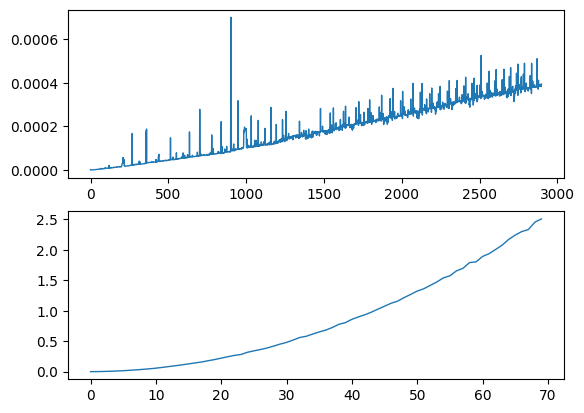

In [33]:
# Computation time calculation
import time
import matplotlib.pyplot as plt

time_rec = [] 
for n_goal in range(1,2900,1):
    t0 = time.monotonic()
    fibonacci_rec(1,1,1,n_goal)
    t1 = time.monotonic()
    time_rec.append(t1-t0)

time_iter = [] 
for n_goal in range(1,700000,10000):
    t0 = time.monotonic()
    fibonacci_iter(n_goal)
    t1 = time.monotonic()
    time_iter.append(t1-t0)

# Plot the timming
fig, ax = plt.subplots(2,1)
ax[0].plot(list(range(0,len(time_rec))), time_rec, linewidth=1.0)
ax[1].plot(list(range(0,len(time_iter))), time_iter, linewidth=1.0)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [20]:
# Problema del cambio de moneda
def coin_exchange(n):
    coins = {200:0,100:0,50:0,20:0,10:0,5:0,2:0,1:0} # Possible coin values
    for coin_val in coins.keys():
        rem = n % coin_val
        coins[coin_val] = (n-rem) / coin_val
        n = rem
    return coins

for num in [15,20,30,40,50,130,210]:
    m = coin_exchange(num) # Change in cents
    print(f"Coins for {num/100} €")
    for k in m.keys():
        if m[k] != 0.0:
            print(int(m[k]), "x", k/100, "€")


Coins for 0.15 €
1 x 0.1 €
1 x 0.05 €
Coins for 0.2 €
1 x 0.2 €
Coins for 0.3 €
1 x 0.2 €
1 x 0.1 €
Coins for 0.4 €
2 x 0.2 €
Coins for 0.5 €
1 x 0.5 €
Coins for 1.3 €
1 x 1.0 €
1 x 0.2 €
1 x 0.1 €
Coins for 2.1 €
1 x 2.0 €
1 x 0.1 €


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [32]:
def n_queens(n):
    board = [-1] * n # Each element will store the row of the queen that goes to the ith column
    solutions = []
    
    def is_valid(row, col): # Check if placing a queen at position (row, col) would cause any conflicts.
        for i in range(col):
            diff = abs(board[i] - row)
            if diff == 0 or diff == col - i:
                return False
        return True

    def place_queen(col): # Place queens on columns from left to right and explore all possible placements.
        if col == n:
            # A valid arrangement has been found; save it as a solution
            solutions.append([x + 1 for x in board])
            return
        
        for row in range(n):
            if is_valid(row, col):
                board[col] = row
                place_queen(col + 1)

    place_queen(0)
    return solutions

# Test cases
for case in [4,5]:
    print(f"N Queens Solutions for {case}:\n")
    for sol in n_queens(case):
        print(" ".join(map(str, sol)))
    print()

N Queens Solutions for 4:

2 4 1 3
3 1 4 2

N Queens Solutions for 5:

1 3 5 2 4
1 4 2 5 3
2 4 1 3 5
2 5 3 1 4
3 1 4 2 5
3 5 2 4 1
4 1 3 5 2
4 2 5 3 1
5 2 4 1 3
5 3 1 4 2

